<a href="https://colab.research.google.com/github/MonikaGost/Winc/blob/master/Module_4_Assignment_Global_Co2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PART 1 - CO2 of the bigger countries**
* Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world (based on the latest measurement). The x-axis should be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the fossil CO2 emissions in Mt CO2 for the given years.

In [101]:
import pandas as pd
emissions = pd.read_csv("https://raw.githubusercontent.com/MonikaGost/Winc/master/co2_emissions.csv")


* Removing rows which do not contain countries

In [117]:
co2_emissions = emissions[emissions["Country"].str.contains("World|European Union") == False]
co2_emissions.set_index("Country", inplace=True)
co2_emissions

,1990,2005,2017,2021
Country,,,,
Afghanistan,3,1,11,8
Albania,7,4,5,5
Algeria,66,98,160,173
Angola,6,16,31,24
Anguilla,0,0,0,0
...,...,...,...,...
Vietnam,20,99,219,321
Western Sahara,0,0,0,0
Yemen,7,22,13,12


* Changing values format to get co2 in Mt.



In [104]:
pd.options.display.float_format = '{0:,.0f}'.format

* Finding top 5 co2 producers by sorting out the list

In [109]:
top_5 = co2_emissions.sort_values(by=["2021"], ascending=False).head(5)
top_5

,1990,2005,2017,2021
Country,,,,
China,"2,397","6,263","10,877","12,466"
United States,"5,086","5,972","5,107","4,752"
India,606,"1,211","2,455","2,649"
Russia,"2,379","1,734","1,765","1,943"
Japan,"1,149","1,277","1,321","1,085"


* Making a graph

In [110]:
import matplotlib.pyplot as plt


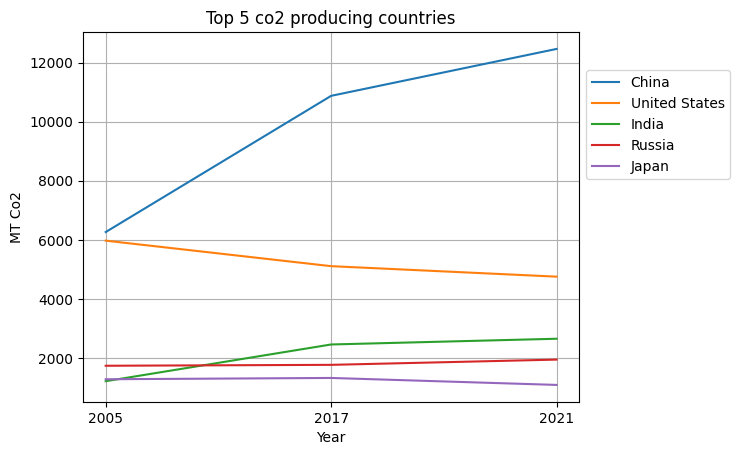

In [114]:
fig, ax = plt.subplots()
years = top_5.columns[1:]

for index, row in top_5.iterrows():
  plt.plot(years, row[1:5], label = index)

plt.title("Top 5 co2 producing countries")
plt.xlabel("Year")
plt.ylabel("MT Co2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.grid()

plt.show()

**PART 2 - worst and best changers**

A.Find the top three and bottom three countries with regards to lowering emissions and plot their results.

In [182]:
# Calculating relative CO2 emissions development over the years
co2_development = co2_emissions.loc[:,"1990":"2021"]
co2_development["1990_base"]=100
co2_development["dev2005"] = (co2_development["2005"]/co2_development["1990"])*100
co2_development["dev2017"] = (co2_development["2017"]/co2_development["1990"])*100
co2_development["dev2021"] = (co2_development["2021"]/co2_development["1990"])*100
co2_development


,1990,2005,2017,2021,1990_base,dev2005,dev2017,dev2021
Country,,,,,,,,
Afghanistan,3,1,11,8,100,42,449,328
Albania,7,4,5,5,100,64,76,70
Algeria,66,98,160,173,100,150,244,263
Angola,6,16,31,24,100,273,528,418
Anguilla,0,0,0,0,100,233,467,500
...,...,...,...,...,...,...,...,...
Vietnam,20,99,219,321,100,492,"1,084","1,593"
Western Sahara,0,0,0,0,100,158,192,167
Yemen,7,22,13,12,100,316,182,175


In [195]:
# Sorting the data base by relative change in emissions
co2_development.sort_values(by=["dev2021"], inplace=True, ascending=True)
co2_development

,1990,2005,2017,2021,1990_base,dev2005,dev2017,dev2021
Country,,,,,,,,
Ukraine,783,354,206,185,100,45,26,24
Moldova,32,8,8,10,100,25,26,30
Armenia,21,5,5,7,100,22,23,33
Georgia,35,5,12,12,100,14,33,34
Latvia,20,8,8,7,100,41,40,36
...,...,...,...,...,...,...,...,...
Turks and Caicos Islands,0,0,0,0,100,71,"2,357","3,571"
Cambodia,0,3,11,17,100,660,"2,595","4,167"
Equatorial Guinea,0,3,2,7,100,"3,475","2,545","7,216"


In [221]:
# I create small table to make a graph from it.

top3 = co2_development.head(3)
bottom3 = co2_development.tail(3)

co2_dev_graph = top3.append(bottom3).loc[:,"1990_base":"dev2021"]
co2_dev_graph


<ipython-input-221-5e8d581a09c1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  co2_dev_graph = top3.append(bottom3).loc[:,"1990_base":"dev2021"]


,1990_base,dev2005,dev2017,dev2021
Country,,,,
Ukraine,100,45,26,24
Moldova,100,25,26,30
Armenia,100,22,23,33
Equatorial Guinea,100,"3,475","2,545","7,216"
Laos,100,492,"1,336","9,744"
Greenland,100,"21,033","17,267","15,333"


Making a graph

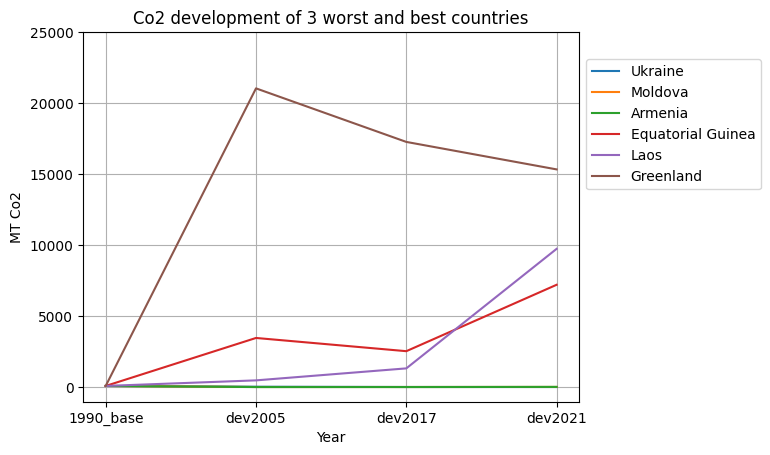

In [194]:
fig, ax = plt.subplots()
years = co2_dev_graph.columns[:]

for index, row in co2_dev_graph.iterrows():
  plt.plot(years, row, label = index)


plt.title("Co2 development of 3 worst and best countries")
plt.xlabel("Year")
plt.ylabel("MT Co2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.grid()

plt.ylim(-1000,25000)


plt.show()



B.  Create the same chart for the top three and bottom three countries that had at least five Mt of CO2 emissions in 1990.

In [223]:
# I get rid off the countries with less than 5 Mt Co2 in 1990 and 2005 and sort out data by relative change in 2017:
bigger_countries = co2_development.loc[co2_development["1990"] >= 5,:]

In [224]:
bigger_countries = bigger_countries.loc[bigger_countries["2005"] >= 5,:]


In [225]:
bigger_countries = bigger_countries.loc[bigger_countries["2017"] >= 5,:]

In [226]:
#Sorting out by co2 relative change in 2021, getting rid off some columns i don't need
bigger_countries.sort_values(by=["dev2021"], inplace=True)

In [229]:
#Sorting out top and bottom 3 countries:
bigger_top3 = bigger_countries.head(3)
bigger_bottom3 = bigger_countries.tail(3)


co2_bigger_graph = bigger_top3.append(bigger_bottom3).loc[:,"1990_base":"dev2021"]
co2_bigger_graph


<ipython-input-229-8e121b1d833c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  co2_bigger_graph = bigger_top3.append(bigger_bottom3).loc[:,"1990_base":"dev2021"]


,1990_base,dev2005,dev2017,dev2021
Country,,,,
Ukraine,100,45,26,24
Moldova,100,25,26,30
Latvia,100,41,40,36
Bangladesh,100,280,610,771
Oman,100,277,660,796
Vietnam,100,492,"1,084","1,593"


Making a graph

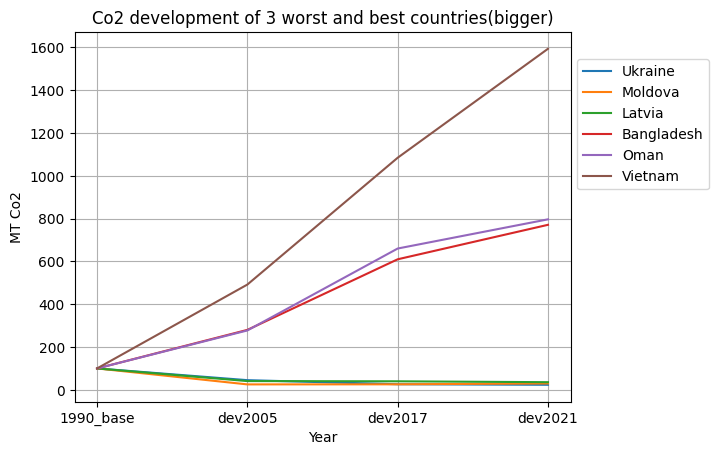

In [230]:
fig, ax = plt.subplots()
years = co2_bigger_graph.columns[:]

for index, row in co2_bigger_graph.iterrows():
  plt.plot(years, row, label = index)

plt.title("Co2 development of 3 worst and best countries(bigger)")
plt.xlabel("Year")
plt.ylabel("MT Co2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.grid()

plt.show()